## Introduction

The field of healthcare is increasingly leveraging data science techniques to understand and predict various aspects of medical costs. In this project, we delve into the intricacies of medical cost predictions using a dataset curated by Miri Choi available on Kaggle. The dataset, titled "Medical Cost Personal Datasets," provides a comprehensive view of factors influencing medical expenses, ranging from individual attributes like age, BMI, and smoking habits to regional information and insurance specifics.

## Source

The dataset used in this analysis originates from Kaggle and was compiled by Miri Choi. The dataset includes information collected from individuals, encompassing various demographic, lifestyle, and healthcare-related attributes. Each entry provides a glimpse into a person's profile along with their corresponding medical expenses, enabling us to explore the relationships between these factors and the costs.

<i>Dataset Source</i>: <a href = "https://www.kaggle.com/datasets/mirichoi0218/insurance">Medical Cost Personal Datasets on Kaggle</a>

## Objective

My primary objective is to develop a regression model that accurately predicts medical costs based on the available attributes. By leveraging machine learning algorithms and regression techniques, I aim to uncover the key drivers influencing medical expenses. This exploration not only contributes to understanding cost determinants but also holds potential implications for insurance companies, policymakers, and healthcare providers in optimizing resource allocation and developing more effective strategies.

# 1. Data Preprocessing

In [1]:
import pandas as pd

In [2]:
medical_df = pd.read_csv('insurance.csv')

# Check first five rows
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
# Check the info of the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above information, there doesn't seem to be any missing values from the dataset. However, for the Data Preprocessing stage, I'll to do the following:

#### Handling Categorical Variables:
   - Convert categorical columns (sex, smoker, region) into numerical representations using techniques like one-hot encoding or label encoding.

#### Feature Engineering:
   - Consider creating new features derived from existing ones if they might contribute to better predictive power (e.g., BMI categories, age groups).

## 1.1 Handling Categorical Variables

In [4]:
# Make a copy of the original dataset
medical_df_copy = medical_df.copy()

# Perform one-hot encoding for categorical columns: sex, smoker, region
categorical_cols = ['sex', 'smoker', 'region']
medical_df_encoded = pd.get_dummies(medical_df_copy, columns = categorical_cols, dtype = 'float', drop_first = True)

# Display the updated dataset with one-hot encoded columns
medical_df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0

   - `pd.get_dummies()` is used to convert categorical variables into dummy/indicator variables.
   - `columns=['sex', 'smoker', 'region']` specifies the columns to be encoded.
   - `drop_first = True` drops the first category in each encoded column, which helps in reducing multicollinearity among the features.

In [5]:
# All features are now numerical
medical_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 94.2 KB


## 1.2 Feature Enginnering

In [6]:
# Age groups
bins = [0, 30, 50, 100]  # Define the age bins
labels = ['young', 'middle-aged', 'senior']  # Labels for the age groups
medical_df_encoded['age_group'] = pd.cut(medical_df_encoded['age'], bins = bins, labels = labels, right = False)

# BMI categories
bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]  # Define BMI bins
bmi_labels = ['underweight', 'normal', 'overweight', 'obese_class1', 'obese_class2', 'obese_class3']  # Labels for BMI categories
medical_df_encoded['bmi_category'] = pd.cut(medical_df_encoded['bmi'], bins = bmi_bins, labels = bmi_labels, right = False)

In [7]:
medical_df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest    age_group  bmi_category  
0               0.0               1.0        young    overweight  
1               1.0               0.0        young  obese_class1  
2               1.0               0.0        young  obese_class1  
3               0.0               0.0  middle-aged        normal  
4               0.0               0.0  middle-aged    overweight

- For 'age_group', we've created three groups: 'young', 'middle-aged', and 'senior', based on age ranges.
- For 'bmi_category', we've categorized BMI values into specific ranges such as 'underweight', 'normal', 'overweight', and different levels of obesity.

## 1.3 Detecting Outliers using Z-Score method:

In [8]:
from scipy import stats

# Columns with potential outliers: 'age', 'bmi', 'charges'
columns_to_check = ['age', 'bmi', 'charges']

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    outliers = data[(z_scores > 3) | (z_scores < -3)]
    return outliers

# Detect outliers for each column
outliers = {}
for column in columns_to_check:
    outliers[column] = detect_outliers_zscore(medical_df_encoded, column)

# Display outliers in DataFrame format
for column, outlier_df in outliers.items():
    print(f"Outliers in '{column}':")
    if len(outlier_df) > 0:
        display(outlier_df)
    else:
        print("No outliers found.")

Outliers in 'age':
No outliers found.
Outliers in 'bmi':


age    bmi  children     charges  sex_male  smoker_yes  \
116    58  49.06         0  11381.3254       1.0         0.0   
847    23  50.38         1   2438.0552       1.0         0.0   
1047   22  52.58         1  44501.3982       1.0         1.0   
1317   18  53.13         0   1163.4627       1.0         0.0   

      region_northwest  region_southeast  region_southwest age_group  \
116                0.0               1.0               0.0    senior   
847                0.0               1.0               0.0     young   
1047               0.0               1.0               0.0     young   
1317               0.0               1.0               0.0     young   

      bmi_category  
116   obese_class3  
847   obese_class3  
1047  obese_class3  
1317  obese_class3

Outliers in 'charges':


age     bmi  children      charges  sex_male  smoker_yes  \
34     28  36.400         1  51194.55914       1.0         1.0   
543    54  47.410         0  63770.42801       0.0         1.0   
577    31  38.095         1  58571.07448       0.0         1.0   
819    33  35.530         0  55135.40209       0.0         1.0   
1146   60  32.800         0  52590.82939       1.0         1.0   
1230   52  34.485         3  60021.39897       1.0         1.0   
1300   45  30.360         0  62592.87309       1.0         1.0   

      region_northwest  region_southeast  region_southwest    age_group  \
34                 0.0               0.0               1.0        young   
543                0.0               1.0               0.0       senior   
577                0.0               0.0               0.0  middle-aged   
819                1.0               0.0               0.0  middle-aged   
1146               0.0               0.0               1.0       senior   
1230               1.0               0.0               0.0       senior   
1300               0.0               1.0               0.0  middle-aged   

      bmi_category  
34    obese_class2  
543   obese_class3  
577   obese_class2  
819   obese_class2  
1146  obese_class1  
1230  obese_class1  
1300  obese_class1

I'll keep the outliers in the dataset by creating a specific identifier for these instances, allowing me to distinguish them during analysis without altering the original values.

#### For BMI Outliers:

In [9]:
# Creating a new column 'is_bmi_outlier' to flag BMI outliers
medical_df_encoded['is_bmi_outlier'] = 0  # Default value for non-outliers

# List of indices for BMI outliers
bmi_outlier_indices = [116, 847, 1047, 1317]

# Flagging BMI outliers with a value of 1
medical_df_encoded.loc[bmi_outlier_indices, 'is_bmi_outlier'] = 1

#### For Charges Outliers:

In [10]:
# Creating a new column 'is_charges_outlier' to flag Charges outliers
medical_df_encoded['is_charges_outlier'] = 0  # Default value for non-outliers

# List of indices for Charges outliers
charges_outlier_indices = [34, 543, 577, 819, 1146, 1230, 1300]

# Flagging Charges outliers with a value of 1
medical_df_encoded.loc[charges_outlier_indices, 'is_charges_outlier'] = 1

In [11]:
medical_df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest    age_group  bmi_category  \
0               0.0               1.0        young    overweight   
1               1.0               0.0        young  obese_class1   
2               1.0               0.0        young  obese_class1   
3               0.0               0.0  middle-aged        normal   
4               0.0               0.0  middle-aged    overweight   

   is_bmi_outlier  is_charges_outlier  
0               0                   0  
1               0                   0  
2               0                   0  
3               0                   0  
4               0                   0

# 2. Exploratory Data Analysis (EDA)

## 2.1 Univariate Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Exploring Age column
plt.figure(figsize = (10,6))
sns.histplot(data = medical_df_encoded, x = 'age', bins = 20)
plt.xticks(range(15,65, 5))
plt.xlabel('Children')
plt.ylabel('Frequency');

In [14]:
plt.figure(figsize = (10,6))
sns.histplot(data = medical_df_encoded, x = 'age', bins = 20, kde = True)
plt.xticks(range(15,65, 5))
plt.xlabel('Age')
plt.ylabel('Frequency');

- The Kernel Density Estimate (KDE) plot for the 'age' column appears almost horizontal, it likely suggests that the data might be evenly distributed or lacks significant variations in density across different age groups.

- This situation could indicate that the distribution of ages is relatively uniform, without prominent peaks or valleys in density. It might also suggest that there's no distinct clustering or pattern visible in the distribution of ages.

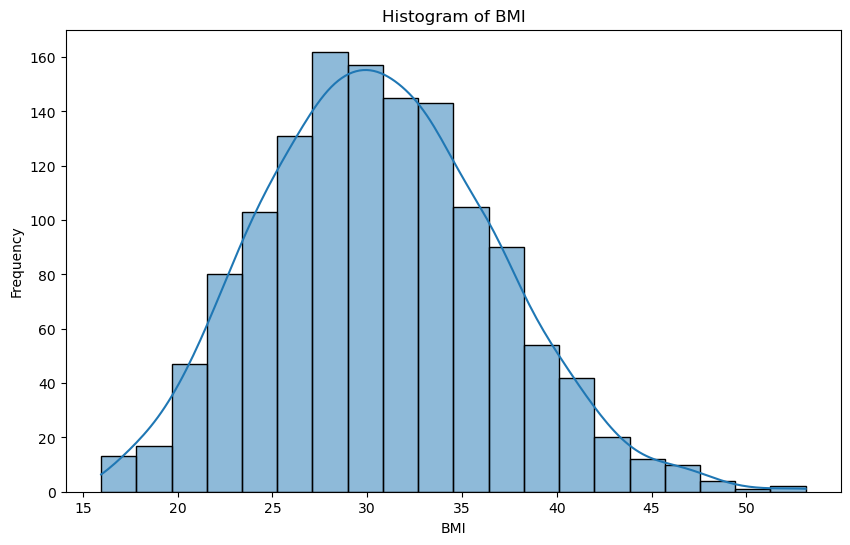

In [15]:
# Exploring children column
plt.figure(figsize = (10,6))
sns.histplot(data = medical_df_encoded, x = 'bmi', bins = 20, kde = True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI');

- The bell curve shape indicates that the dataset has a relatively higher concentration or density of individuals with a BMI around 30.

- This concentration suggests that BMI values near 30 are more prevalent or frequent within the dataset compared to other BMI values.

- BMI 30 falls within the range categorized as overweight by BMI standards. This concentration might indicate a notable representation of individuals within the overweight or slightly obese category in your dataset.

In [16]:
# Exploring children column
plt.figure(figsize = (10,6))
sns.histplot(data = medical_df_encoded, x = 'children', bins = 20, kde = True)
plt.xlabel('Children')
plt.ylabel('Frequency');

- This type of distribution is common in datasets related to family demographics or insurance, where households with fewer children tend to be more prevalent than those with more children. The decreasing count as the number of children increases aligns with demographic trends.

- The KDE plot showing a downward bell curve at each count of children, which implies that the density of observations decreases as the number of children increases. This pattern is expected since families with higher numbers of children are usually less common in the dataset.

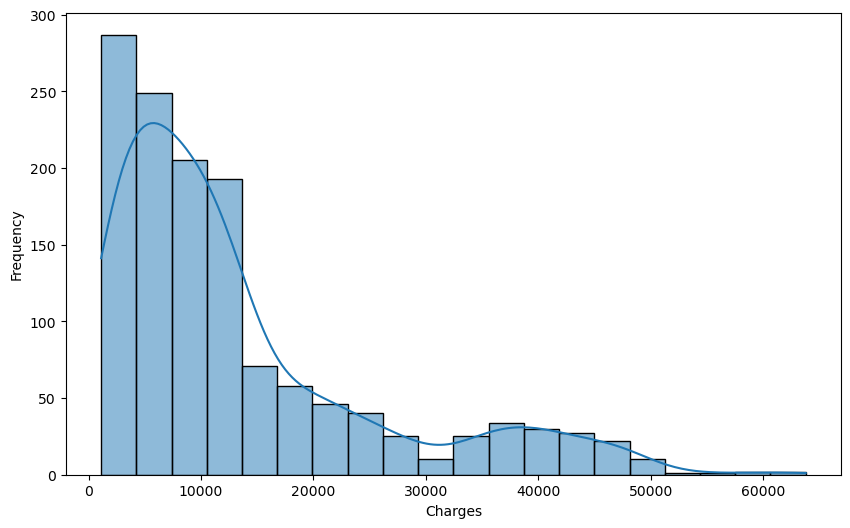

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data = medical_df_encoded, x = 'charges', bins = 20, kde = True)
plt.xlabel('Charges')
plt.ylabel('Frequency');

The KDE plot of 'charges' show a **Left-Skewed Distribution**. 

- The bell curve on the left side indicates higher density or concentration of lower 'charges'. This suggests that a significant portion of the dataset comprises individuals with lower medical charges.

### Count Plots for categorical variables

In [18]:
# Count plot for 'sex_male'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'sex_male', data = medical_df_encoded)
plt.xlabel('Male (0) / Female (1)')
plt.ylabel('Count')
plt.title('Count of Males and Females')
plt.show()

# Count plot for 'smoker_yes'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'smoker_yes', data = medical_df_encoded)
plt.xlabel('Non-smoker (0) / Smoker (1)')
plt.ylabel('Count')
plt.title('Count of Smokers and Non-smokers')
plt.show()

In the dataset, the count of individuals identified as non-smokers significantly outweighs the count of smokers. Approximately over a 1000 individuals are categorized as non-smokers, while the count for smokers is slightly above 200. This substantial discrepancy between the two groups indicates a prevalent representation of non-smokers within the dataset compared to smokers. Such a disparity in counts suggests that the dataset is more heavily populated with individuals who are identified as non-smokers, potentially indicating a substantial proportion of the studied population does not engage in smoking habits.

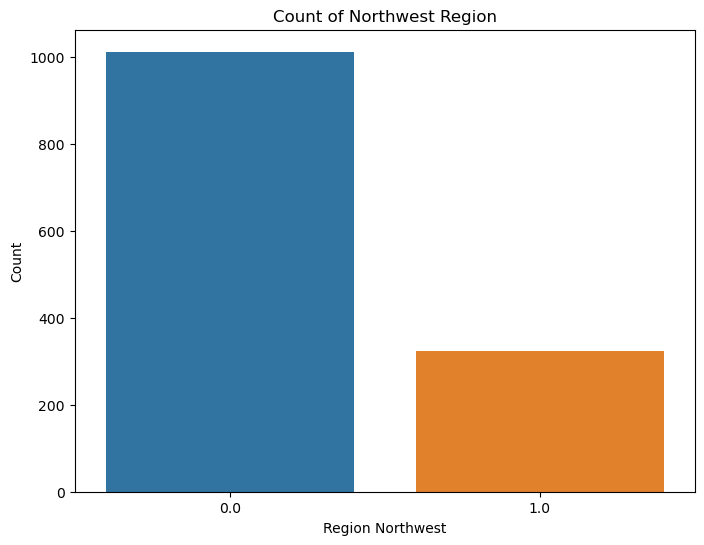

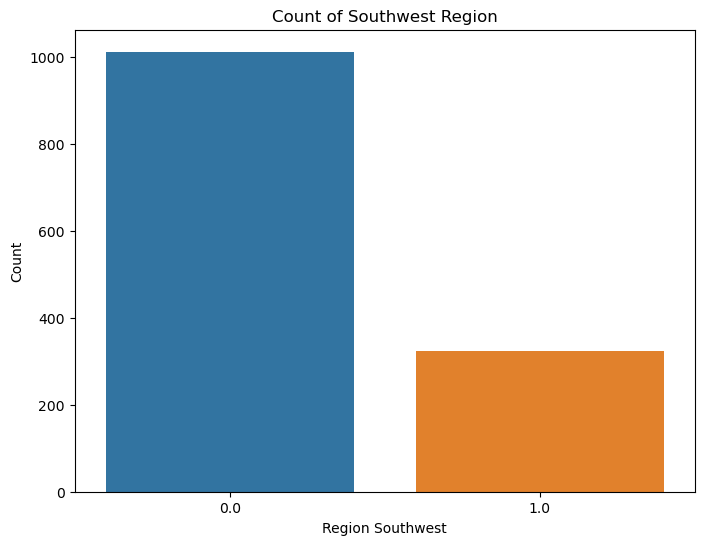

In [19]:
# Count plot for 'region_northwest'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'region_northwest', data = medical_df_encoded)
plt.xlabel('Region Northwest')
plt.ylabel('Count')
plt.title('Count of Northwest Region')
plt.show()

# Count plot for 'region_southeast'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'region_southeast', data = medical_df_encoded)
plt.xlabel('Region Southeast')
plt.ylabel('Count')
plt.title('Count of Southeast Region')
plt.show()

# Count plot for 'region_southwest'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'region_southwest', data = medical_df_encoded)
plt.xlabel('Region Southwest')
plt.ylabel('Count')
plt.title('Count of Southwest Region')
plt.show()

Let's see the value counts of the different regions

In [20]:
# Value counts for 'region_northwest'
counts_northwest = medical_df_encoded['region_northwest'].value_counts()
print("Value counts for region_northwest:")
print(counts_northwest)

# Value counts for 'region_southeast'
counts_southeast = medical_df_encoded['region_southeast'].value_counts()
print("\nValue counts for region_southeast:")
print(counts_southeast)

# Value counts for 'region_southwest'
counts_southwest = medical_df_encoded['region_southwest'].value_counts()
print("\nValue counts for region_southwest:")
print(counts_southwest)

Value counts for region_northwest:
region_northwest
0.0    1013
1.0     325
Name: count, dtype: int64

Value counts for region_southeast:
region_southeast
0.0    974
1.0    364
Name: count, dtype: int64

Value counts for region_southwest:
region_southwest
0.0    1013
1.0     325
Name: count, dtype: int64


- Across these encoded columns, there's a noticeable disparity in counts between regions, implying different population distributions among the regions.

- The 'southeast' region appears to have a relatively higher count of instances compared to 'northwest' and 'southwest'.

## 2.2 Bivariate/Multivariate Analysis

I will convert the 'age_group' and 'bmi_category' columns to numerical before checking the correlation.

In [21]:
categorical_cols = ['age_group', 'bmi_category']

# Apply one-hot encoding with drop_first
medical_df_encoded = pd.get_dummies(medical_df_encoded, columns = categorical_cols, dtype = float, drop_first = True)

In [22]:
medical_df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  is_bmi_outlier  is_charges_outlier  \
0               0.0               1.0               0                   0   
1               1.0               0.0               0                   0   
2               1.0               0.0               0                   0   
3               0.0               0.0               0                   0   
4               0.0               0.0               0                   0   

   age_group_middle-aged  age_group_senior  bmi_category_normal  \
0                    0.0               0.0                  0.0   
1                    0.0               0.0                  0.0   
2                    0.0               0.0                  0.0   
3                    1.0               0.0                  1.0   
4                    1.0               0.0                  0.0   

   bmi_category_overweight  bmi_category_obese_class1  \
0                      1.0                        0.0   
1                      0.0                        1.0   
2                      0.0                        1.0   
3                      0.0                        0.0   
4                      1.0                        0.0   

   bmi_category_obese_class2  bmi_category_obese_class3  
0                        0.0                        0.0  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        0.0                        0.0  
4                        0.0                        0.0

Let's check the correlation of the features

In [26]:
corr = medical_df_encoded.corr()

corr

age       bmi  children   charges  sex_male  \
age                        1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi                        0.109272  1.000000  0.012759  0.198341  0.046371   
children                   0.042469  0.012759  1.000000  0.067998  0.017163   
charges                    0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male                  -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes                -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest          -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast          -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest           0.010016 -0.006205  0.021914 -0.043210 -0.004184   
is_bmi_outlier            -0.034922  0.185263 -0.027034  0.007240  0.054189   
is_charges_outlier         0.021060  0.068722 -0.022907  0.266144  0.009602   
age_group_middle-aged      0.028999 -0.010890  0.245701 -0.009916 -0.002453   
age_group_senior           0.787245  0.103919 -0.093904  0.243211 -0.014906   
bmi_category_normal       -0.079191 -0.593545  0.012675 -0.106265 -0.022690   
bmi_category_overweight   -0.012910 -0.319722 -0.020039 -0.120083 -0.026460   
bmi_category_obese_class1  0.007846  0.176657  0.028485  0.061002  0.021215   
bmi_category_obese_class2  0.086994  0.480795 -0.023807  0.139349  0.017278   
bmi_category_obese_class3  0.026455  0.551294  0.003356  0.078421  0.029829   

                           smoker_yes  region_northwest  region_southeast  \
age                         -0.025019         -0.000407         -0.011642   
bmi                          0.003750         -0.135996          0.270025   
children                     0.007673          0.024806         -0.023066   
charges                      0.787251         -0.039905          0.073982   
sex_male                     0.076185         -0.011156          0.017117   
smoker_yes                   1.000000         -0.036945          0.068498   
region_northwest            -0.036945          1.000000         -0.346265   
region_southeast             0.068498         -0.346265          1.000000   
region_southwest            -0.036945         -0.320829         -0.346265   
is_bmi_outlier               0.006136         -0.031016          0.089574   
is_charges_outlier           0.142908          0.007240          0.002227   
age_group_middle-aged        0.038688         -0.004248          0.007480   
age_group_senior            -0.044353          0.001862         -0.013869   
bmi_category_normal          0.019430          0.038898         -0.090755   
bmi_category_overweight     -0.020629          0.050934         -0.092712   
bmi_category_obese_class1   -0.024720          0.038422         -0.045683   
bmi_category_obese_class2    0.019430         -0.091577          0.147237   
bmi_category_obese_class3    0.017395         -0.097633          0.201747   

                           region_southwest  is_bmi_outlier  \
age                                0.010016       -0.034922   
bmi                               -0.006205        0.185263   
children                           0.021914       -0.027034   
charges                           -0.043210        0.007240   
sex_male                          -0.004184        0.054189   
smoker_yes                        -0.036945        0.006136   
region_northwest                  -0.320829       -0.031016   
region_southeast                  -0.346265        0.089574   
region_southwest                   1.000000       -0.031016   
is_bmi_outlier                    -0.031016        1.000000   
is_charges_outlier                 0.007240       -0.003971   
age_group_middle-aged             -0.000691       -0.044766   
age_group_senior                   0.009561       -0.004565   
bmi_category_normal               -0.030999       -0.024620   
bmi_category_overweight            0.027853       -0.034868   
bmi_category_obese_class1          0.026926       -0.03518

<Axes: >

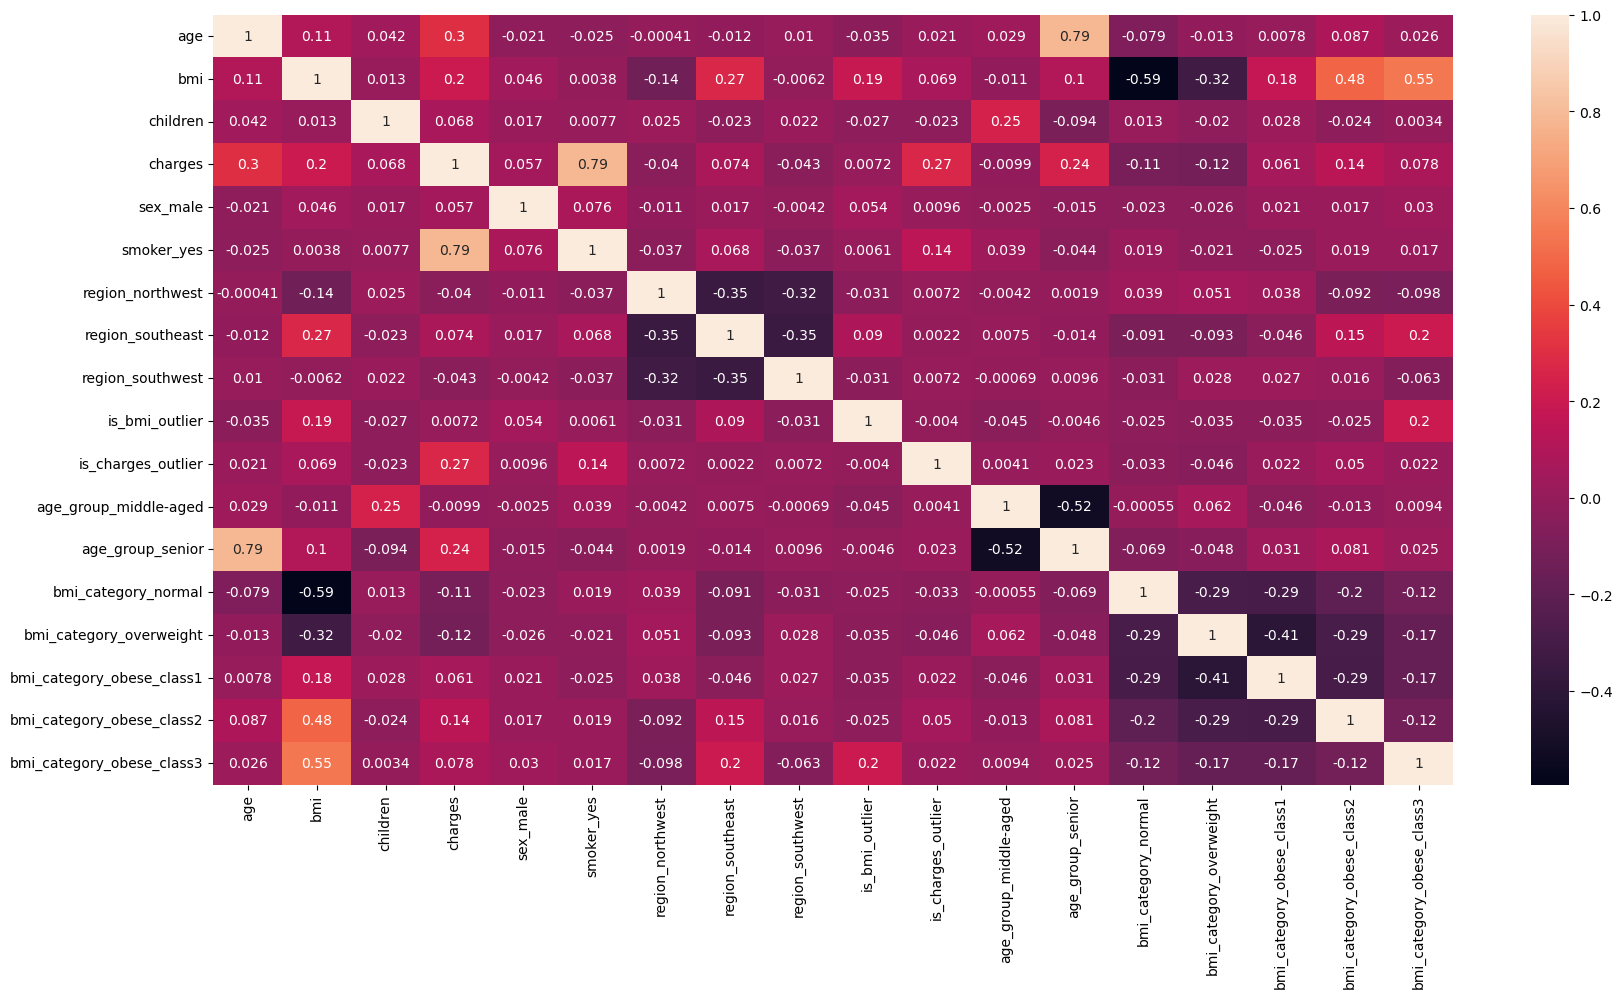

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)

In [29]:
corr['charges']

age                          0.299008
bmi                          0.198341
children                     0.067998
charges                      1.000000
sex_male                     0.057292
smoker_yes                   0.787251
region_northwest            -0.039905
region_southeast             0.073982
region_southwest            -0.043210
is_bmi_outlier               0.007240
is_charges_outlier           0.266144
age_group_middle-aged       -0.009916
age_group_senior             0.243211
bmi_category_normal         -0.106265
bmi_category_overweight     -0.120083
bmi_category_obese_class1    0.061002
bmi_category_obese_class2    0.139349
bmi_category_obese_class3    0.078421
Name: charges, dtype: float64

### Strong Correlation:
- **'smoker_yes' (0.787251)**: Indicates a strong positive correlation between being a smoker and higher charges. This suggests that smokers tend to have significantly higher medical charges compared to non-smokers.

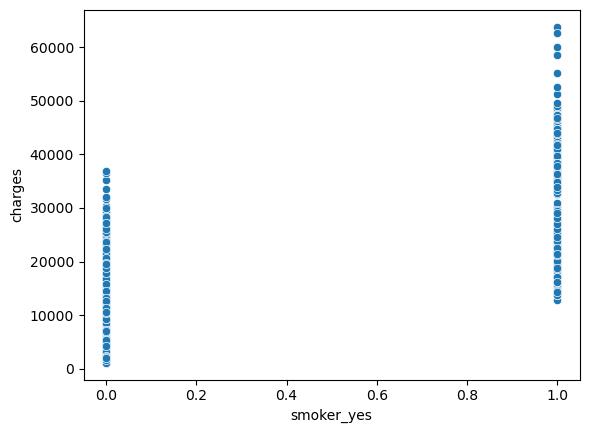

In [38]:
sns.scatterplot(medical_df_encoded, x = 'smoker_yes', y = 'charges');

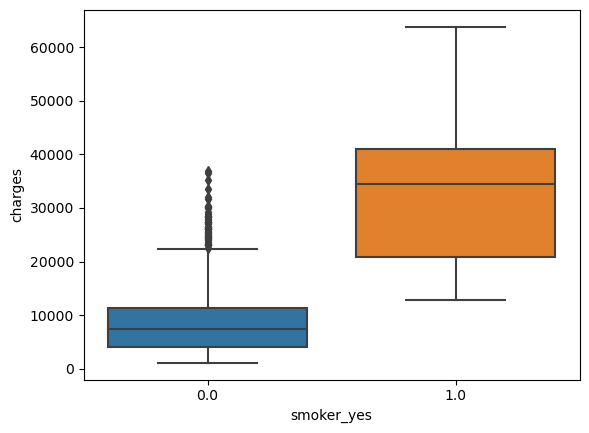

In [50]:
sns.boxplot(medical_df_encoded, x = 'smoker_yes', y = 'charges');

- We can see that the charges for non-smokers ranges from the lowest point to apporximately 40000 in 'charges'. 
- We also see that the charges for smokers is higher as it ranges from about 15000 to over 60000.

### Moderate Correlations:

- **'age' (0.299008)**: Shows a moderate positive correlation with charges, indicating that as age increases, medical charges tend to increase, albeit less strongly than smoking's impact.

- **'age_group_senior' (0.243211)**: Indicates a moderate positive correlation with charges, suggesting that being in the senior age group has a moderate influence on higher medical charges.

- **'bmi' (0.198341)**: Demonstrates a moderate positive correlation between Body Mass Index (BMI) and charges, implying that higher BMI is somewhat associated with higher medical charges.
  
- **'bmi_category_obese_class2' (0.139349)**: Shows a moderate positive correlation with charges, suggesting that individuals classified in the 'obese_class2' BMI category tend to have higher medical charges.


In [45]:
sns.scatterplot(medical_df_encoded, x = 'age', y = 'charges');

In [49]:
sns.boxplot(medical_df_encoded, x = 'age_group_senior', y = 'charges');

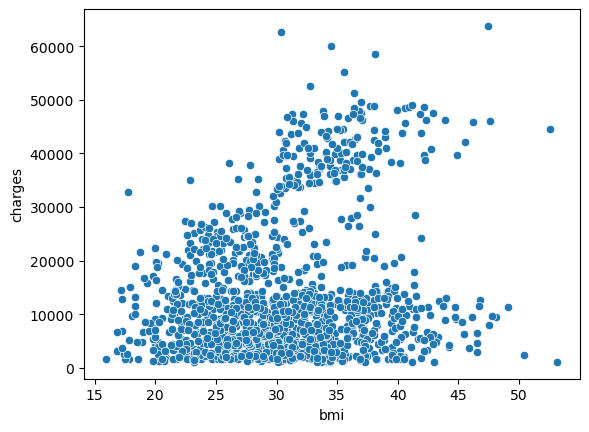

In [46]:
sns.scatterplot(medical_df_encoded, x = 'bmi', y = 'charges');

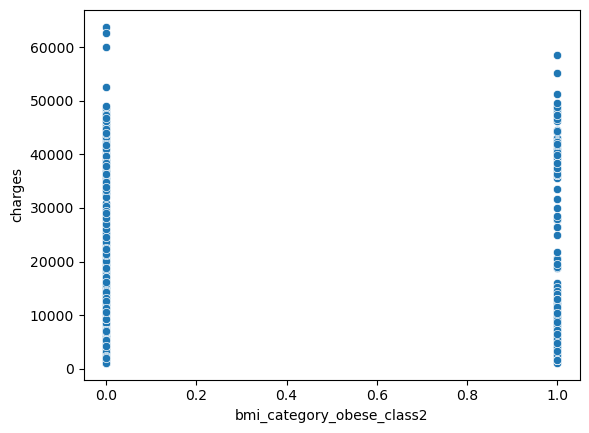

In [61]:
sns.scatterplot(medical_df_encoded, x = 'bmi_category_obese_class2', y = 'charges');

In [62]:
sns.boxplot(medical_df_encoded, x = 'bmi_category_obese_class2', y = 'charges');


### Weak Correlations:

- **'region_northwest', 'region_southeast', 'region_southwest'**: Display weak correlations (close to zero) with charges, suggesting these regions might not strongly impact medical charges compared to other factors in the dataset.

- **'children', 'sex_male', 'is_bmi_outlier', 'is_charges_outlier', 'age_group_middle-aged', 'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese_class1', 'bmi_category_obese_class3'**: These features exhibit very weak correlations with charges (close to zero), indicating minimal influence on medical charges based on the correlation coefficient.

# 3. Data Modeling

For this problem, I'll be using 3 diffrent regression models. These are:

1. ElasticNet Regression
2. Random Forest Regression
3. XGBoost Regression

In [66]:
medical_df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  is_bmi_outlier  is_charges_outlier  \
0               0.0               1.0               0                   0   
1               1.0               0.0               0                   0   
2               1.0               0.0               0                   0   
3               0.0               0.0               0                   0   
4               0.0               0.0               0                   0   

   age_group_middle-aged  age_group_senior  bmi_category_normal  \
0                    0.0               0.0                  0.0   
1                    0.0               0.0                  0.0   
2                    0.0               0.0                  0.0   
3                    1.0               0.0                  1.0   
4                    1.0               0.0                  0.0   

   bmi_category_overweight  bmi_category_obese_class1  \
0                      1.0                        0.0   
1                      0.0                        1.0   
2                      0.0                        1.0   
3                      0.0                        0.0   
4                      1.0                        0.0   

   bmi_category_obese_class2  bmi_category_obese_class3  
0                        0.0                        0.0  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        0.0                        0.0  
4                        0.0                        0.0

## 3.1 Spliiting the Data into X & y, with y being the 'charges' column

In [67]:
X = medical_df_encoded.drop('charges', axis = 1)
y = medical_df_encoded['charges']

In [70]:
X

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0       0.0         1.0               0.0   
1      18  33.770         1       1.0         0.0               0.0   
2      28  33.000         3       1.0         0.0               0.0   
3      33  22.705         0       1.0         0.0               1.0   
4      32  28.880         0       1.0         0.0               1.0   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3       1.0         0.0               1.0   
1334   18  31.920         0       0.0         0.0               0.0   
1335   18  36.850         0       0.0         0.0               0.0   
1336   21  25.800         0       0.0         0.0               0.0   
1337   61  29.070         0       0.0         1.0               1.0   

      region_southeast  region_southwest  is_bmi_outlier  is_charges_outlier  \
0                  0.0               1.0               0                   0   
1                  1.0               0.0               0                   0   
2                  1.0               0.0               0                   0   
3                  0.0               0.0               0                   0   
4                  0.0               0.0               0                   0   
...                ...               ...             ...                 ...   
1333               0.0               0.0               0                   0   
1334               0.0               0.0               0                   0   
1335               1.0               0.0               0                   0   
1336               0.0               1.0               0                   0   
1337               0.0               0.0               0                   0   

      age_group_middle-aged  age_group_senior  bmi_category_normal  \
0                       0.0               0.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       1.0               0.0                  1.0   
4                       1.0               0.0                  0.0   
...                     ...               ...                  ...   
1333                    0.0               1.0                  0.0   
1334                    0.0               0.0                  0.0   
1335                    0.0               0.0                  0.0   
1336                    0.0               0.0                  0.0   
1337                    0.0               1.0                  0.0   

      bmi_category_overweight  bmi_category_obese_class1  \
0                         1.0                        0.0   
1                         0.0                        1.0   
2                         0.0                        1.0   
3                         0.0                        0.0   
4                         1.0                        0.0   
...                       ...                        ...   
1333                      0.0                        1.0   
1334                      0.0                        1.0   
1335                      0.0                        0.0   
1336                      1.0                        0.0   
1337                      1.0                        0.0   

      bmi_category_obese_class2  bmi_category_obese_class3  
0                           0.0                        0.0  
1                           0.0                        0.0  
2                           0.0                        0.0  
3                           0.0                        0.0  
4                           0.0                        0.0  
...                         ...                        ...  
1333                        0.0                        0.0  
1334                        0.0                        0.0  
1335                        1.0                        0.0  
1336                

In [72]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## 3.2 Splitting the data into training and test sets

I'll be using 25% of the data for the test set and a random_state equal to 42 for reproducibility.

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [74]:
len(X_train)

1003

In [76]:
len(y_train)

1003

In [75]:
len(X_test)

335

In [77]:
len(y_test)

335

## 3.3 Feature Scaling

For this, I'll be using `RobustScaler`.

### Reasons for Choosing RobustScaler:

#### 1. Outlier Robustness:
- `RobustScaler` is more robust to outliers compared to `StandardScaler` or `MinMaxScaler`. It scales the data based on quartiles and the median, which makes it less affected by outliers.

#### 2. Handling Outliers:
- Since I've chosen to keep the outliers in the analysis, `RobustScaler` can maintain the data's overall distribution and prevent the influence of outliers on scaling.

In [79]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Checking X_train_Scaled
print(X_train_scaled)

[[-0.625      -0.79622871 -0.5        ...  0.          0.
   0.        ]
 [-0.45833333 -0.44890511  0.5        ...  0.          0.
   0.        ]
 [ 0.5         1.15571776  0.         ...  0.          1.
   0.        ]
 ...
 [ 0.79166667 -0.61131387 -0.5        ...  0.          0.
   0.        ]
 [-0.08333333  2.11678832  0.5        ...  0.          0.
   1.        ]
 [ 0.66666667 -0.03649635 -0.5        ...  0.          0.
   0.        ]]


In [82]:
# Checking X_test_Scaled
print(X_test_scaled)

[[ 0.25       -0.61131387  0.5        ...  0.          0.
   0.        ]
 [-0.125      -0.02189781 -0.5        ...  1.          0.
   0.        ]
 [ 1.04166667 -0.40328467 -0.5        ...  0.          0.
   0.        ]
 ...
 [-0.20833333  0.3163017   0.         ...  1.          0.
   0.        ]
 [-0.83333333  0.00608273 -0.5        ...  1.          0.
   0.        ]
 [ 0.08333333  0.40754258 -0.5        ...  1.          0.
   0.        ]]


## 3.4 Regression Model Performance Function

I'll use a function to evaluate how well the ElasticNet, Random Forest, and XGBoost model performs in terms of:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Sqaured Error (RMSE)
- R-Squared

In [92]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(y_test, y_preds):
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    
    # Create DataFrame to store evaluation metrics
    metrics_df = pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R-squared': [r2]})
    return metrics_df

### 3.4.1 ElasticNet Model

In [85]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
elasticnet_preds = elasticnet.predict(X_test_scaled)

### 3.4.2 Random Forest Model

In [88]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train_scaled, y_train)
rf_preds = random_forest.predict(X_test_scaled)

### 3.4.2 XGBoost Regressor

In [89]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)

### 3.4.3 Evaluating Performance of Models

In [96]:
elasticnet_metrics = evaluate_regression_model(y_test, elasticnet_preds)
rf_metrics = evaluate_regression_model(y_test, rf_preds)
xgb_metrics = evaluate_regression_model(y_test, xgb_preds)

# Display evaluation metrics
print("ElasticNet Regression Metrics:")
elasticnet_metrics

ElasticNet Regression Metrics:


MAE           MSE         RMSE  R-squared
0  7461.797577  9.516146e+07  9755.073697   0.369337

In [99]:
print("Random Forest Regression Metrics:")
rf_metrics

Random Forest Regression Metrics:


MAE           MSE         RMSE  R-squared
0  2551.42238  2.067933e+07  4547.453241   0.862952

In [100]:
print("XGBoost Regression Metrics:")
xgb_metrics

XGBoost Regression Metrics:


MAE           MSE         RMSE  R-squared
0  2729.354907  2.577332e+07  5076.743534   0.829193

#### Random Forest Regression:
- **Advantages:** It shows the lowest MAE and RMSE, indicating better accuracy and performance among the models. It also has the highest R-squared, suggesting a good fit to the data.
- **Considerations:** Random Forests might be less interpretable compared to linear models like ElasticNet.
Recommendation:

#### XGBoost Regression:
- **Advantages:** It performs reasonably well with a lower MAE and a high R-squared, indicating good predictive capability.
- **Considerations:** While not as accurate as Random Forest in this scenario, XGBoost is robust and often performs well in various situations.

Considering the metrics and trade-offs between interpretability and predictive power:

- If interpretability is crucial, I could consider the ElasticNet despite its lower performance, as linear models are more interpretable.
- If high predictive performance is the priority, I'll choose the Random Forest Regression, given its superior accuracy metrics in this context.

For this project, I'll be choosing the **Random Forest** model.

## 3.5 Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

best_rf_preds = best_rf.predict(X_test_scaled)
best_rf_metrics = evaluate_regression_model(y_test, best_rf_preds)
print("\nImproved Random Forest Metrics:")
best_rf_metrics

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score (negative MSE): -21481810.661244106

Improved Random Forest Metrics:


MAE           MSE         RMSE  R-squared
0  2507.777485  1.984456e+07  4454.723167   0.868484

#### Improved Random Forest Metrics:
- **MAE:** 2507.78 (down from 2551.42)
- **MSE:** 1.98e+07 (down from 2.07e+07)
- **RMSE:** 4454.72 (down from 4547.45)
- **R-squared:** 0.868 (up from 0.863)

#### Observations:
1. **MAE and RMSE Reduction:** The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) decreased, indicating improved accuracy in predicting charges.
2. **MSE Improvement:** The Mean Squared Error (MSE) decreased significantly, showcasing enhanced model performance in minimizing prediction errors.
3. **R-squared Improvement:** The R-squared value increased, suggesting that the model explains a higher proportion of variance in the target variable.

## 3.6 Feature Importances

I'll examine the importance of different features in predicting charges.

In [106]:
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df[:10], palette = 'mako')
plt.title('Top 10 Features - Importance in Predicting Charges')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [107]:
feature_importance_df

Feature  Importance
4                  smoker_yes    0.655684
1                         bmi    0.183990
0                         age    0.127306
2                    children    0.011992
9          is_charges_outlier    0.007725
5            region_northwest    0.001932
3                    sex_male    0.001815
7            region_southwest    0.001700
15  bmi_category_obese_class2    0.001627
6            region_southeast    0.001620
13    bmi_category_overweight    0.001385
12        bmi_category_normal    0.001063
14  bmi_category_obese_class1    0.000914
10      age_group_middle-aged    0.000685
11           age_group_senior    0.000291
16  bmi_category_obese_class3    0.000272
8              is_bmi_outlier    0.000000

#### Observations:

- **Key Predictors:** Smoking status, BMI, and age are crucial factors influencing medical charges, as indicated by their higher importance scores.
- **Less Significant Features:** Certain categorical features related to regions and BMI categories exhibit relatively lower importance scores.

## 3.7 Final Model Evaluation

In [108]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cross_val_scores = -cross_val_scores  # convert negative MSE to positive

mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

print("Cross-validation Mean MSE:", mean_cv_score)
print("Cross-validation Std Deviation of MSE:", std_cv_score)

Cross-validation Mean MSE: 21481810.661244106
Cross-validation Std Deviation of MSE: 4179570.4679256245


- The mean MSE of approximately 21 million suggests the model's ability to predict charges with a moderate level of accuracy. However, the high standard deviation of MSE indicates variability in prediction accuracy across different subsets, signifying potential inconsistency or sensitivity to varying data distributions.

- Further analysis or refinement might be necessary to reduce this variability and enhance the model's consistency and generalizability across different data subsets or scenarios.

## 3.8 Holdout Set Evaluation

In [109]:
holdout_preds = best_rf.predict(X_test_scaled)
holdout_metrics = evaluate_regression_model(y_test, holdout_preds)
print("Holdout Set Metrics:")
print(holdout_metrics)

Holdout Set Metrics:
           MAE           MSE         RMSE  R-squared
0  2507.777485  1.984456e+07  4454.723167   0.868484


### Interpretation of the Holdout Set Evaluation

Overall, the model performs relatively well on the holdout set, with a strong ability to predict medical charges. The R-squared value demonstrates a substantial portion of the variance in charges being captured by the model.

The errors (MAE, MSE, RMSE) seem acceptable considering the context of predicting medical charges, though further improvements may still be possible.

## 3.9 Visualizing Model Performance

### Actual vs. Predicted Charges

In [110]:
# Plotting actual vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, holdout_preds, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

### Distribution of Residuals (Error Analysis)

In [114]:
residuals = y_test - holdout_preds

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor = 'k')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### Conclusion:

The Random Forest model showcases a substantial ability to estimate medical charges based on individual attributes, further enhancements and fine-tuning could be explored to improve predictive accuracy. Future iterations might involve more sophisticated feature engineering, additional data sources, or alternative modeling techniques to capture nuances and complexities within medical charges more effectively.

In conclusion, the developed Random Forest Regression model offers a solid foundation for predicting medical charges. However, continual refinement and iterative improvements are necessary for enhancing its accuracy and robustness, ensuring its applicability in real-world scenarios within the healthcare domain.